# POSTTEST 3
_________________________

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

bolaBasket = pd.read_csv('all_seasonss.csv',sep=";") #membaca file csv
bolaBasket.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,9.979.024,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,11.793.392,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,9.525.432,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697.424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,10.886.208,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


### 1. Grafik Batang

### 
Diagram batang memvisualisasikan poin rata-rata per game (PPG) untuk setiap tim NBA berdasarkan kumpulan data yang disediakan. Tim diwakili pada sumbu x, dan rata-rata PPG yang sesuai diwakili pada sumbu y. Ketinggian palang menunjukkan kinerja penilaian rata-rata setiap tim.

Dari grafik, terlihat jelas tim mana yang memiliki rata-rata PPG lebih tinggi, dan informasi ini dapat berguna untuk menilai performa ofensif. Menganalisis statistik tersebut dapat membantu mengidentifikasi tim dengan kemampuan mencetak gol yang kuat, tren potensial, atau area yang perlu ditingkatkan. Penting untuk dicatat bahwa analisis dan wawasan spesifik akan bergantung pada variabel yang dipilih untuk visualisasi dan tujuan analisis.

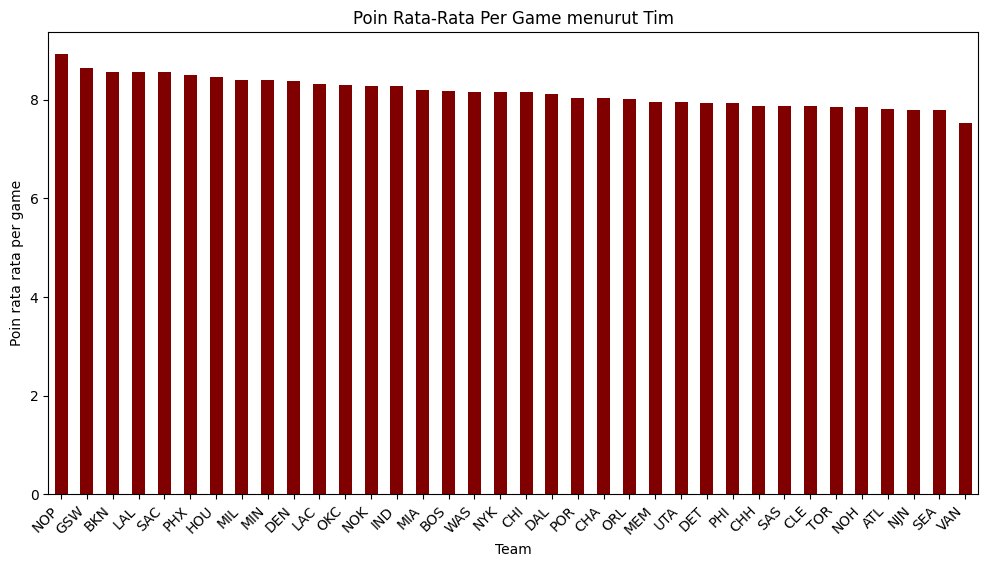

In [35]:
average_ppg_by_team = bolaBasket.groupby('team_abbreviation')['pts'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_ppg_by_team.plot(kind='bar', color='maroon')
plt.title('Poin Rata-Rata Per Game menurut Tim')
plt.xlabel('Team')
plt.ylabel('Poin rata rata per game')
plt.xticks(rotation=45, ha='right')  
plt.show()

### 2. Pie Chart

Diagram lingkaran menggambarkan sebaran pemain NBA berdasarkan musim bermainnya. Setiap irisan mewakili musim yang berbeda, dan ukuran setiap irisan sesuai dengan persentase pemain di posisi tersebut relatif terhadap jumlah total pemain dalam kumpulan data.i.

In [31]:
data_pie = bolaBasket['pts'].value_counts().rename('reb').reset_index(name='id_count') 
data_pie

,pts,id_count
0,2.0,169
1,0.0,156
2,4.0,147
3,3.0,141
4,3.3,130
...,...,...
309,30.7,1
310,26.2,1
311,32.1,1
312,31.1,1


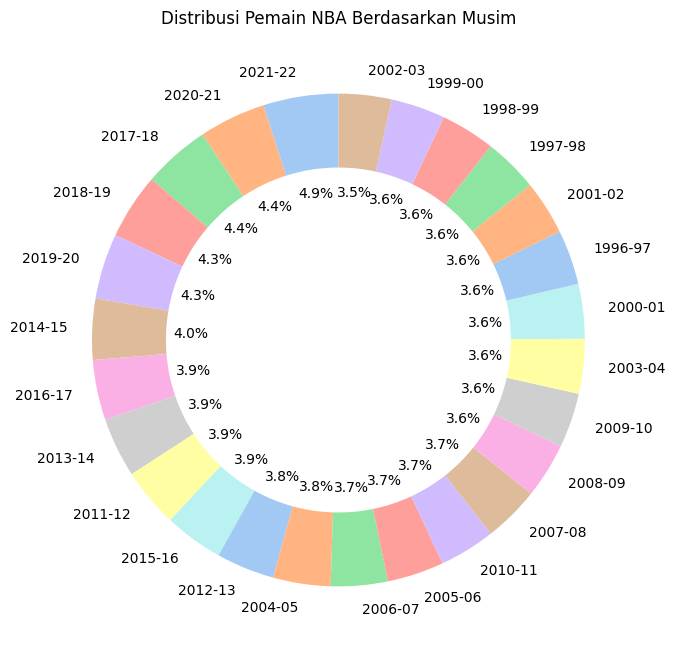

In [36]:
# Assuming 'position' is a column indicating player positions
position_distribution = bolaBasket['season'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
position_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Distribusi Pemain NBA Berdasarkan Musim')
plt.ylabel('')  # Remove y-label for better aesthetics
plt.show()


## 3. Heatmap

Heatmap memvisualisasikan matriks korelasi statistik pemain numerik dalam kumpulan data NBA. Setiap sel mewakili koefisien korelasi antara dua variabel. Warna menunjukkan kekuatan dan arah korelasi: warna yang lebih hangat menunjukkan korelasi positif, warna yang lebih dingin menunjukkan korelasi negatif, dan warna yang mendekati putih menunjukkan korelasi yang lebih lemah.ata.

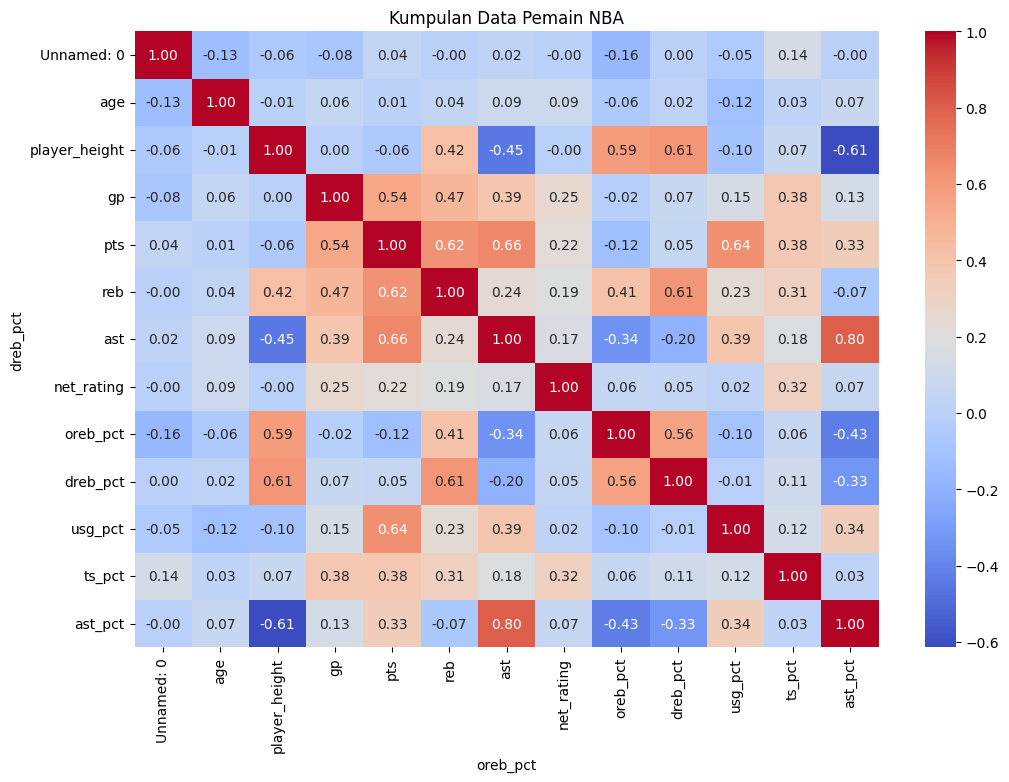

In [37]:
# Selecting relevant numerical columns for correlation matrix
numeric_columns = bolaBasket.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Kumpulan Data Pemain NBA')
plt.xlabel('oreb_pct')
plt.ylabel('dreb_pct')
plt.show()


## 4. Histogram

Histogram memberikan representasi visual distribusi usia pemain dalam dataset NBA. Sumbu x mewakili rentang usia, dan sumbu y mewakili frekuensi atau jumlah pemain dalam setiap rentang usia.

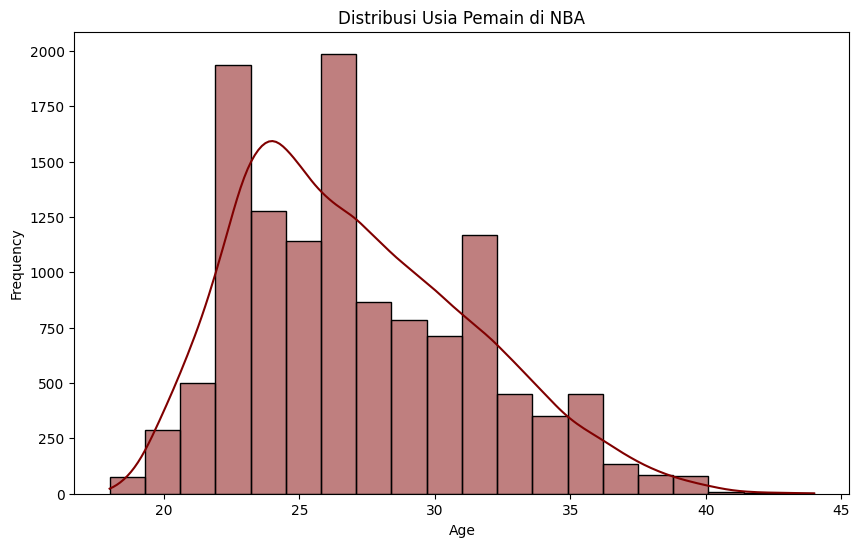

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(bolaBasket['age'], bins=20, kde=True, color='maroon')
plt.title('Distribusi Usia Pemain di NBA')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()